In [123]:
from rastervision.raster_sources.geotiff_files import GeoTiffFiles
from rastervision.core.raster_transformer import RasterTransformer
import numpy as np
import imageio
import json
from rastervision.utils.misc import *

In [3]:
!ls /opt/raw-data/


2013-0611-OkMoreEast_ortho_1_1.tif  2013-0611-OkMoreEast_ortho_3_1.tif
2013-0611-OkMoreEast_ortho_1_2.tif  2013-0611-OkMoreEast_ortho_3_2.tif
2013-0611-OkMoreEast_ortho_1_3.tif  2013-0611-OkMoreEast_ortho_3_3.tif
2013-0611-OkMoreEast_ortho_1_4.tif  2013-0611-OkMoreEast_ortho_3_4.tif
2013-0611-OkMoreEast_ortho_1_5.tif  2013-0611-OkMoreEast_ortho_3_5.tif
2013-0611-OkMoreEast_ortho_2_1.tif  2013-0611-OkMoreEast_ortho_4_1.tif
2013-0611-OkMoreEast_ortho_2_2.tif  2013-0611-OkMoreEast_ortho_4_2.tif
2013-0611-OkMoreEast_ortho_2_3.tif  2013-0611-OkMoreEast_ortho_4_3.tif
2013-0611-OkMoreEast_ortho_2_4.tif  2013-0611-OkMoreEast_ortho_4_4.tif
2013-0611-OkMoreEast_ortho_2_5.tif  2013-0611-OkMoreEast_ortho_4_5.tif


In [21]:
class O():
    def __init__(self):
        self.channel_order = [0, 1, 2]
rt = RasterTransformer(O())
rs = GeoTiffFiles(rt, ["/opt/raw-data/2013-0611-OkMoreEast_ortho_1_5.tif"])

Loading GeoTiffFFiles...


In [22]:
    def get_train_windows():
        extent = rs.get_extent()
        chip_size = 200
        stride = chip_size
        windows = []
        for window in extent.get_windows(chip_size, stride):
            chip = rs.get_chip(window)
            if np.sum(chip.ravel()) > 0:
                windows.append(window)
        return windows

In [25]:
windows = get_train_windows()

In [26]:
len(windows)

786

In [28]:
windows[400]


[ 4000.   800.  4200.  1000.]

In [30]:
chip = rs._get_chip(windows[400])

In [32]:
c = np.transpose(
        rs.image_dataset.read(window=windows[400].rasterio_format()), axes=[1, 2, 0])

In [33]:
c

array([[[ 538,  934,  937, 6910],
        [ 592,  937,  988, 6516],
        [ 538,  848,  892, 5604],
        ..., 
        [ 324,  614,  638, 5358],
        [ 374,  674,  668, 5578],
        [ 423,  734,  703, 5851]],

       [[ 570,  938,  969, 6771],
        [ 602,  935,  999, 6525],
        [ 547,  853,  904, 5628],
        ..., 
        [ 330,  627,  653, 5398],
        [ 400,  717,  709, 5727],
        [ 453,  788,  766, 6005]],

       [[ 584,  938,  983, 6660],
        [ 617,  951, 1021, 6601],
        [ 552,  853,  912, 5658],
        ..., 
        [ 363,  689,  714, 5470],
        [ 437,  786,  794, 5810],
        [ 499,  865,  871, 6057]],

       ..., 
       [[ 555,  871,  963, 5102],
        [ 553,  862,  943, 5140],
        [ 549,  851,  917, 5185],
        ..., 
        [2121, 2195, 2479, 3108],
        [2133, 2224, 2532, 3192],
        [2159, 2254, 2575, 3234]],

       [[ 552,  869,  964, 5079],
        [ 546,  855,  939, 5082],
        [ 540,  841,  909, 5103],
     

In [34]:
    info = np.iinfo(c.dtype)
    cs = c.astype(np.float64) / info.max
    cs = 255 * cs
    cs = cs.astype(np.uint8)


In [38]:
save_img(cs, "/opt/rvroot/test.png")


In [40]:
c.shape

(200, 200, 4)

In [41]:
mb = rs.image_dataset.read(window=windows[400].rasterio_format())

In [106]:
def color_correct(band):
    min_value, max_value = (np.min(band[np.nonzero(band)]), 2500)#band.max())
    print("{}_{}".format(min_value, max_value))
    return (np.maximum(((np.minimum(band, max_value) - min_value) / (max_value - min_value)), 0) * 255).astype(np.uint8)

r = color_correct(mb[0])
g = color_correct(mb[1])
b = color_correct(mb[2])


100_2500
333_2500
337_2500


In [107]:
c2 = np.transpose(np.array([r, g, b]), axes=[1, 2, 0])

In [108]:
c2 = c2.astype(np.uint8)

In [109]:
save_img(c2, "/opt/rvroot/test5.png")

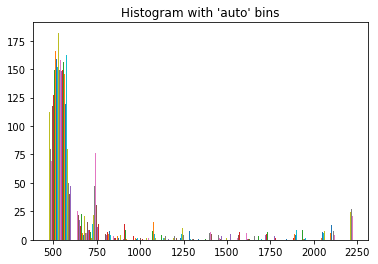

In [77]:
import matplotlib.pyplot as plt

plt.hist(mb[0], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")



In [78]:
plt.show()

In [113]:
!ls /opt/rvroot/rv-output/datasets/airbus-2013-0611-OkMoreEast_ortho/models/resnet50/output/debug/model

In [114]:
c.dtype

dtype('uint16')

In [116]:
np.iinfo(c.dtype).max

65535

In [117]:
import os


In [119]:
import imageio

In [120]:
i = imageio.imread("/opt/rvroot/rv-output/datasets/airbus-2013-0611-OkMoreEast_ortho/output/training/damage/1570.tiff")

/opt/conda/lib/python3.5/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_packbits'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/opt/conda/lib/python3.5/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_lzw'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/opt/conda/lib/python3.5/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'unpack_ints'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/opt/conda/lib/python3.5/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'reverse_bitorder'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))


In [121]:
i.shape

(100, 100, 3)

In [124]:
js = json.loads(open('/opt/rvroot/2013-0611-OkMoreEast_ortho.geojson').read())

In [126]:
ff = list(filter(lambda x: x['properties']['class_id'] == 1, js['features']))

In [133]:
njs = {"type":"FeatureCollection","features": ff }
open("/opt/rvroot/2013-0611-OkMoreEast_ortho-od.geojson", 'w').write(json.dumps(njs))

379174

In [135]:
len(ff)

531

In [131]:
import rasterio
src = rasterio.open('/opt/raw-data/2013-0611-OkMoreEast_ortho_1_5.tif')

In [136]:
src.shape

(6500, 6126)

In [137]:
import pyproj

In [139]:
web_proj = pyproj.Proj(init='epsg:4326')

In [141]:
image_proj = pyproj.Proj(init=src.crs['init'])

In [142]:
src.crs['init']

'epsg:32614'